In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import tensorflow as tf2
import numpy as np
import matplotlib as plt
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
batchSize=500
size = 256 

In [7]:
######## SENTINEL 1 AFTER ########

# Read `TFRecordDatasets`


#fileNames = "/content/drive/MyDrive/DATA/" + place + "/after-00000.tfrecord"

fileNames = "/content/drive/MyDrive/S1after-00000.tfrecord"


dataset = tf2.data.TFRecordDataset(fileNames,compression_type=None)
  
feature_columns = {
  'VV': tf2.io.FixedLenFeature(shape=[size, size], dtype=tf2.float32),
}  
  
dataset = dataset.map(lambda example: tf2.io.parse_single_example(example, feature_columns))

#dataset = dataset.map(parse, num_parallel_calls=3)
#dataset = dataset.map(stack_images, num_parallel_calls=3)
  
dataset = dataset.batch(batchSize)
 # <RepeatDataset shapes: (None, 256, 256, 3), types: tf.float32>

for x in dataset:
  VV = x['VV'].numpy()


img_after = []
for i in range(0,VV.shape[0]):
  data = VV[i,:,:]
  image =  (data - np.min(data)) / (np.max(data) - np.min(data))
  img_after.append(image)

print(len(img_after))

256


In [8]:
######## SENTINEL 1 BEFORE ########

# Read `TFRecordDatasets`

#fileNames = "/content/drive/MyDrive/DATA/" + place + "before-00000.tfrecord"
fileNames = "/content/drive/MyDrive/S1before-00000.tfrecord"

dataset = tf2.data.TFRecordDataset(fileNames,compression_type=None)
  
feature_columns = {
  'VV': tf2.io.FixedLenFeature(shape=[size, size], dtype=tf2.float32),
}  
  
dataset = dataset.map(lambda example: tf2.io.parse_single_example(example, feature_columns))

#dataset = dataset.map(parse, num_parallel_calls=3)
#dataset = dataset.map(stack_images, num_parallel_calls=3)
  
dataset = dataset.batch(batchSize)
 # <RepeatDataset shapes: (None, 256, 256, 3), types: tf.float32>

for x in dataset:
  VV = x['VV'].numpy()

img_before = []
for i in range(0,VV.shape[0]):
  data = VV[i,:,:]
  image = (data - np.min(data)) / (np.max(data) - np.min(data))
  img_before.append(image)


print(len(img_before))

256


In [15]:
######## AFTER ########
batchSize=500
# Read `TFRecordDatasets`

size = 256 
#fileNames = "/content/drive/MyDrive/DATA/" + place + "/after-00000.tfrecord"

fileNames = "/content/drive/MyDrive/S2after-00000.tfrecord"


dataset = tf2.data.TFRecordDataset(fileNames,compression_type=None)
  
feature_columns = {
  'B11': tf2.io.FixedLenFeature(shape=[size, size], dtype=tf2.float32),
  'B8': tf2.io.FixedLenFeature(shape=[size, size], dtype=tf2.float32),
  'B3': tf2.io.FixedLenFeature(shape=[size, size], dtype=tf2.float32),

}  
  
dataset = dataset.map(lambda example: tf2.io.parse_single_example(example, feature_columns))

#dataset = dataset.map(parse, num_parallel_calls=3)
#dataset = dataset.map(stack_images, num_parallel_calls=3)
  
dataset = dataset.batch(batchSize)
 # <RepeatDataset shapes: (None, 256, 256, 3), types: tf.float32>

for x in dataset:
  band11 = x['B11'].numpy()
  band8=x['B8'].numpy()
  band3 = x['B3'].numpy()

img_after = []
for i in range(0,band11.shape[0]):
  image = np.dstack((band11[i,:,:],band8[i,:,:],band3[i,:,:]))
  img_after.append(image)

print(len(img_after))

256


In [16]:
######## BEFORE ########

# Read `TFRecordDatasets`

#fileNames = "/content/drive/MyDrive/DATA/" + place + "before-00000.tfrecord"
fileNames = "/content/drive/MyDrive/S2before-00000.tfrecord"
dataset = tf2.data.TFRecordDataset(fileNames,compression_type=None)
  
feature_columns = {
  'B11': tf2.io.FixedLenFeature(shape=[size, size], dtype=tf2.float32),
  'B8': tf2.io.FixedLenFeature(shape=[size, size], dtype=tf2.float32),
  'B3': tf2.io.FixedLenFeature(shape=[size, size], dtype=tf2.float32),

}  
  
dataset = dataset.map(lambda example: tf2.io.parse_single_example(example, feature_columns))

#dataset = dataset.map(parse, num_parallel_calls=3)
#dataset = dataset.map(stack_images, num_parallel_calls=3)
  
dataset = dataset.batch(batchSize)
 # <RepeatDataset shapes: (None, 256, 256, 3), types: tf.float32>

for x in dataset:
  band11 = x['B11'].numpy()
  band8=x['B8'].numpy()
  band3 = x['B3'].numpy()

img_before = []
for i in range(0,band11.shape[0]):
  image = np.dstack((band11[i,:,:],band8[i,:,:],band3[i,:,:]))
  img_before.append(image)


print(len(img_before))

256


In [ ]:
######## MASK ########

import tensorflow.compat.v1 as tf
import warnings
warnings.filterwarnings("ignore")
tf.disable_v2_behavior()
#fileNames = "/content/drive/MyDrive/DATA/" + place + "GT-00000.tfrecord"
fileNames = "/content/drive/MyDrive/GT-00000.tfrecord"
size = 256

def read_and_decode(filename_queue):
  reader = tf.TFRecordReader()
  _, serialized_example = reader.read(filename_queue)
  features = tf.parse_single_example(
      serialized_example,
      # Defaults are not specified since both keys are required.
      features={
          'constant': tf.FixedLenFeature([], tf.string),
          
      })
  image = tf.decode_raw(features['constant'], tf.uint8)
  
  return image

with tf.Session() as sess:
  filename_queue = tf.train.string_input_producer([fileNames])
  image = read_and_decode(filename_queue)
  image = tf.reshape(image, tf.stack([size, size]))
  image.set_shape([size,size])
  init_op = tf.initialize_all_variables()
  sess.run(init_op)
  coord = tf.train.Coordinator()
  threads = tf.train.start_queue_runners(coord=coord)
  labels =[]
  for i in range(len(images_after)):
    example = sess.run([image])
    labels.append(example)

    
masks =[]
for i in range(0,len(labels)):
  masks.append(np.reshape(np.array(labels[i]),(size,size)))


print(len(masks))

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replac

In [ ]:
##### GET RID OF BLACK PATCHES


indxs = []
sums = []
#threshold 5% foreground/backround ratio
thresh = 0.05
img_before =[]
img_after = []
label = []

for i in range(0,len(masks)):
  sum = np.sum(np.concatenate(masks[i]))
  sums.append(sum)
  
  


for i in range(0,len(masks)):
  if sums[i] > thresh:
    indxs.append(i)
    img_before.append(images_before[i])
    img_after.append(images_after[i])
    label.append(masks[i])

print("Number of samples :")
print(len(label))


Number of samples :
44


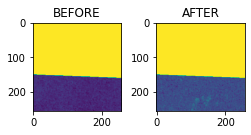

In [9]:
index = 15
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(img_before[index])
ax.set_title('BEFORE')
ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(img_after[index])
ax.set_title('AFTER')
#ax = fig.add_subplot(1, 3, 3)
#imgplot = plt.imshow(label[index],cmap=plt.cm.gray)
#ax.set_title('Mask')


plt.subplots_adjust(wspace=0.4, hspace=0.5)


In [17]:

from PIL import Image
savepath = "/content/drive/MyDrive/flood_mapping/NEW/2021/EVOIA/Sentinel2/"
for i in range(0,len(img_before)): 

  array1 = img_before[i]*255
  array1 = array1.astype(np.uint8)
  data = Image.fromarray(array1)       
  data.save(savepath + "BEFORE/" + "imbefore_"+str(i)+".png")  

  array2 = img_after[i]*255
  array2 = array2.astype(np.uint8)
  data = Image.fromarray(array2)       
  data.save(savepath + "AFTER/" + "imafter_"+str(i)+".png")

  #array3 = label[i]*255
  #array3 = array3.astype(np.uint8)
  #data = Image.fromarray(array3)       
  #data.save(savepath + "MASK/" + "gt_"+str(i)+".png")  
